# VGG16 Implementation on MNIST dataset
## Author: Tom Tabak (Student ID:160889015)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import cv2

(x_train, y_train), (x_test, y_test) =mnist.load_data()

x_train=x_train.astype('uint8')
x_test=x_test.astype('uint8')

no_classes = len(list(set(y_train)))

y_train, y_test=keras.utils.to_categorical(y_train, no_classes), keras.utils.to_categorical(y_test, no_classes)
print(np.shape(x_train))
X_train = []
for i in range(np.shape(x_train)[0]):
    res = cv2.resize(x_train[i], (224, 224))
    X_train.append(res)
X_train=np.array(X_train)
X_train = np.reshape(X_train, [np.shape(X_train)[0], 224,224,1])
print(np.shape(X_train))

input_shape = (224, 224, 1)

#Instantiate an empty model
def VGG16():
  model = Sequential([
      Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      Conv2D(512, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
      Flatten(),
      Dense(4096, activation='relu'),
      Dense(4096, activation='relu'),
      Dense(no_classes, activation='softmax')])

  model.summary()

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

VGG16 = VGG16()

vgg_hist = VGG16.fit(X_train, y_train, epochs =10, validation_split=0.2, verbose=2, batch_size=32)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 224, 224, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
__________________

{'val_loss': [0.05541860307508614, 0.04786435680849536, 0.04113404062956397, 0.07686314715512163, 0.04353589754998635, 0.036667484640891417, 0.05208935865558752, 0.053423429137379574, 0.04328963743827411, 0.07869366085484186], 'val_accuracy': [0.9835000038146973, 0.9856666922569275, 0.9880833625793457, 0.9800000190734863, 0.9887499809265137, 0.9907500147819519, 0.987666666507721, 0.9865833520889282, 0.9910833239555359, 0.9805833101272583], 'loss': [2.6788055383648364, 0.08122606046480782, 0.051975660081330866, 0.09693466972400226, 0.03302932877163145, 0.030711441594071125, 0.029820906600079116, 0.034223647964585366, 0.02565293581074846, 0.02825407847537699], 'accuracy': [0.9359583, 0.9773125, 0.9846875, 0.9755625, 0.9905, 0.9914375, 0.9915208, 0.9908958, 0.99264586, 0.9920625]}


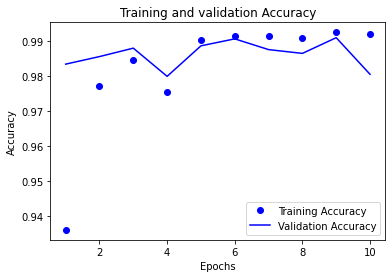

In [0]:
import matplotlib.pyplot as plt

history_dict = vgg_hist.history
print(history_dict)
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

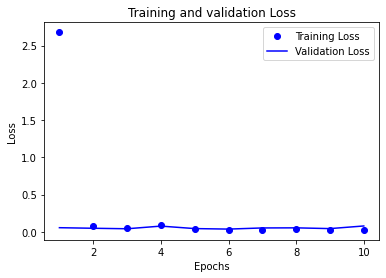

In [0]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
X_test = []
for i in range(np.shape(x_test)[0]):
    res = cv2.resize(x_test[i], (224, 224))
    X_test.append(res)
X_test=np.array(X_test)
X_test = np.reshape(X_test, [np.shape(X_test)[0], 224,224,1])
print('Accuracy: {}'.format(VGG16.evaluate(X_test, y_test, batch_size=32)[1]))

10000/10000 [==============================] - 85s 9ms/step
Accuracy: 0.9882000088691711
